In [6]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

df = pd.read_csv("./data/kuenstliche_daten.csv")

sum_of_zivilstand = df.groupby(['stojahr', 'Zivilstand'], as_index = True).agg('count').reset_index(drop=False)
sum_of_zivilstand[sum_of_zivilstand['Zivilstand'] == 'verheiratet']["stsadrid"]

C:\Users\bruno\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning:

Columns (9,13) have mixed types.Specify dtype option on import or set low_memory=False.



4     1300
12    1292
20    1252
28    1251
36    1244
44    1248
52    1206
61    1201
70    1200
79    1190
87    1151
Name: stsadrid, dtype: int64

In [7]:
df_clean = df.copy()

df_clean.loc[df_clean["Zuzug"] != df_clean["stojahr"], 'Zuzug Ort'] = None 
       
"""for index, row in df_clean.iterrows():
    print(row["Zuzug Ort"][-100:])
    print(row["Zuzug Ort"])
    
    if index == 10:
        break"""
searchfor = ['ZH', 'BE', 'LU', 'UR', 'SZ', 'OW', 'NW', 'GL', 'ZG', 'FR', 'SO', 'BS', 'BL', 'SH', 'AR', 'AI', 'SG', 'GR', 'AG', 'TG', 'TI', 'VD', 'VS', 'NE', 'GE', 'JU']

print("Does every Zuzugsort contain Kantonskürzel?: ")
if((df_clean["Zuzug Ort"].str.contains('|'.join(searchfor)).count() - df_clean["Zuzug Ort"].count()) == 0): print("Yes") 
else: print("No")

zuzug_ort_size = df_clean.groupby(['stojahr', 'Zuzug Ort'], as_index = True).size().reset_index(name='Size')
zuzug_ort_size

Does every Zuzugsort contain Kantonskürzel?: 
Yes


,stojahr,Zuzug Ort,Size
0,2010,Aarwangen BE,1
1,2010,Aeschi SO,2
2,2010,Bellach SO,1
3,2010,Bern BE,3
4,2010,Bettlach SO,1
...,...,...,...
975,2020,Wohlen bei Bern BE,1
976,2020,Worb BE,3
977,2020,Zielebach BE,2
978,2020,Zollikofen BE,4


This is the format of your plot grid:
[ (1,1) x,y ]



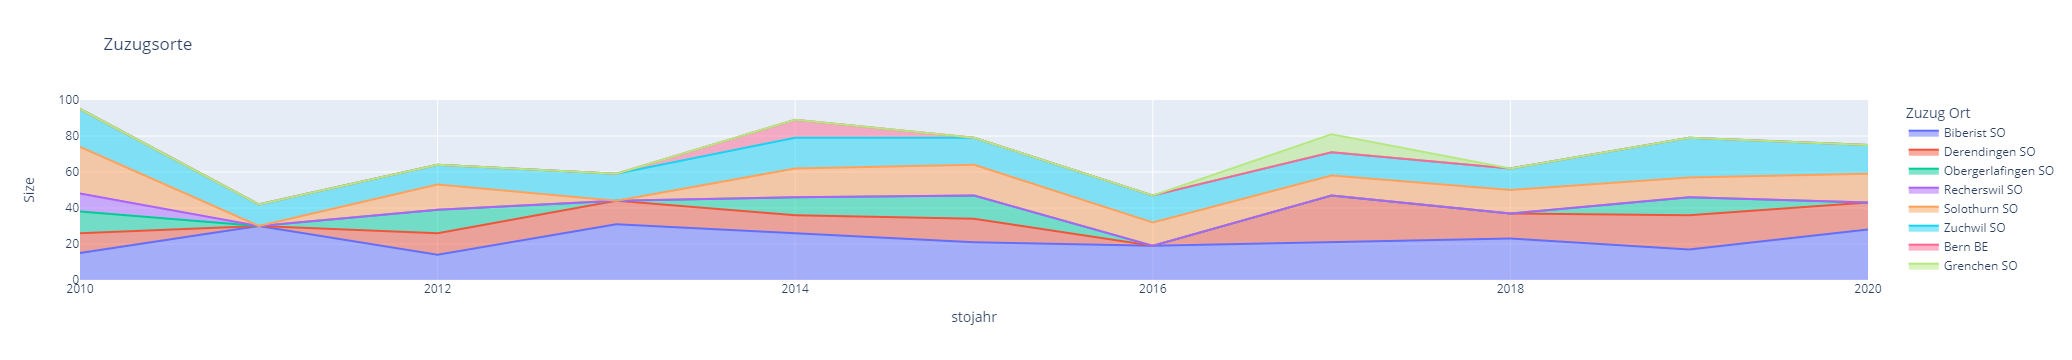

In [9]:
from plotly.subplots import make_subplots

zuzug1 = zuzug_ort_size[zuzug_ort_size["Size"] >= 10]
#Rest
zuzug2 = zuzug_ort_size[zuzug_ort_size["Size"] < 10].groupby(['stojahr'], as_index = False).sum()

fig = make_subplots(cols=1, rows=1)
fig = px.area(zuzug1, x="stojahr", y="Size", color="Zuzug Ort", title="Zuzugsorte")
#fig2 = px.bar(zuzug2, x="stojahr", y="Size", color=pd.Series(["Rest"]).repeat(len(zuzug2)), color_discrete_sequence=["lightblue"], title="Long-Form Input")


#fig.add_trace(fig2['data'][0], row=1, col=1)
fig.print_grid()

fig.show()

In [162]:
import json
with open("./data/gemeinde.geojson", 'r', encoding='utf-8') as fp:
    jdata = json.load(fp)
features = jdata

zuzug_ort_size_cleannames = zuzug_ort_size.copy()
zuzug_ort_size_cleannames["Zuzug_Ort"] = zuzug_ort_size["Zuzug Ort"].str[:-3]
print(zuzug_ort_size_cleannames.head(5))

years = zuzug_ort_size_cleannames["stojahr"].unique()

for year in years:
    df = pd.DataFrame([[year, "Gerlafingen", df_clean[df_clean.stojahr == year].count().stsadrid, "Gerlafingen"]], columns=['stojahr', 'Zuzug Ort', 'Size', 'Zuzug_Ort'])
    zuzug_ort_size_cleannames = zuzug_ort_size_cleannames.append(df)

   stojahr     Zuzug Ort  Size  Zuzug_Ort
0     2010  Aarwangen BE     1  Aarwangen
1     2010     Aeschi SO     2     Aeschi
2     2010    Bellach SO     1    Bellach
3     2010       Bern BE     3       Bern
4     2010   Bettlach SO     1   Bettlach


In [166]:
def plot_choropleth(geojson, featureid, data, locations, customdata, dateaxis):

    years = data[dateaxis].unique()
    plot_df = data[data[dateaxis] == 2010]
    #print(plot_df)
    fig_data = go.Choroplethmapbox(
                geojson = geojson, #Assign geojson file
                featureidkey = featureid, #Assign feature key
                locations = plot_df[locations], #Assign location data
                z=plot_df[customdata],
                customdata=plot_df[customdata],
                colorscale = 'Hot',
                colorbar_title = "Anzahl Zuzüger",
                marker = dict(line = dict (color = 'rgb(10,10,10)', width = 1)),
                reversescale = True,
                zmin=0,
                zmid=10,
                zmax=30,
                zauto=False,
                showscale = True
            )

    #Update layout

    fig_layout = go.Layout(mapbox_zoom=7,
                           mapbox_accesstoken="pk.eyJ1IjoiYnJ1bm9rIiwiYSI6ImNreTFudXczcTBkaTcycG1ycmhuam9vbHIifQ.LrEo_3aEhP_frROP2BsApQ",
                           mapbox_center={"lat": 46.8, "lon": 8.5},
                           height = 900,
                           mapbox_style = "light",
                           plot_bgcolor=None, title = "Map der Gerlafingen-Zuzüger")


    fig_layout["updatemenus"] = [dict(type="buttons",
                                      buttons=[dict(label="Play",
                                                    method="animate",
                                                    args=[None,
                                                          dict(frame=dict(duration=1000,
                                                                          redraw=True),
                                                               fromcurrent=True)]),
                                               dict(label="Pause",
                                                    method="animate",
                                                    args=[[None],
                                                          dict(frame=dict(duration=0,
                                                                          redraw=True),
                                                               mode="immediate")])],
                                      direction="left",
                                      pad={"r": 10, "t": 35},
                                      showactive=False,
                                      x=0.1,
                                      xanchor="right",
                                      y=0,
                                      yanchor="top")]

    sliders_dict = dict(active=len(years) - 1,
                        visible=True,
                        yanchor="top",
                        xanchor="left",
                        currentvalue=dict(font=dict(size=20),
                                          prefix="Date: ",
                                          visible=True,
                                          xanchor="right"),
                        pad=dict(b=10,
                                 t=10),
                        len=0.875,
                        x=0.125,
                        y=0,
                        steps=[])

    fig_frames = []
    for year in years:
        plot_df = data[data[dateaxis] == year]
        #print(year, plot_df)
        frame = go.Frame(data=[go.Choroplethmapbox(
                                    featureidkey = featureid, #Assign feature key
                                    locations = plot_df[locations], #Assign location data
                                    z=plot_df[customdata],
                                    customdata=plot_df[customdata],
                                    colorbar_title = "Anzahl Zuzüger",
                                    marker = dict(line = dict (color = 'rgb(10,10,10)', width = 1)),
                                    reversescale = True,
                                    zmin=0,
                                    zmid=10,
                                    zmax=30,
                                    zauto=False,
                                    showscale = True
                            )],
                            name=str(year))
        fig_frames.append(frame)

        slider_step = dict(args=[[str(year)],
                                 dict(mode="immediate",
                                      frame=dict(duration=300,
                                                 redraw=True))],
                           method="animate",
                           label=str(year))
        sliders_dict["steps"].append(slider_step)

    fig_layout.update(sliders=[sliders_dict])
    # Plot the figure 
    fig=go.Figure(data=fig_data, layout=fig_layout, frames=fig_frames)
    fig.update_traces(locationmode="Switzerland", selector=dict(type='choropleth'))
    fig.update_geos(fitbounds="locations", visible=False)
    fig.show(renderer="iframe")
    fig.write_html("./data/mapplot,html")

In [167]:
plot_choropleth(features, "properties.name", zuzug_ort_size_cleannames, "Zuzug_Ort", "Size", "stojahr")